In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/datasets/Uber/Uber.csv')
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'], errors='coerce')
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'], errors='coerce')
df = df.sort_values(['START_DATE*', 'END_DATE*'])

df['START_DATE*'].unique()

<DatetimeArray>
['2016-01-01 21:11:00', '2016-01-02 01:25:00', '2016-01-02 20:25:00',
 '2016-01-05 17:31:00', '2016-01-06 14:42:00', '2016-01-06 17:15:00',
 '2016-01-06 17:30:00', '2016-01-07 13:27:00', '2016-01-10 08:05:00',
 '2016-01-10 12:17:00',
 ...
 '2016-12-30 11:31:00', '2016-12-30 15:41:00', '2016-12-30 16:45:00',
 '2016-12-30 23:06:00', '2016-12-31 01:07:00', '2016-12-31 13:24:00',
 '2016-12-31 15:03:00', '2016-12-31 21:32:00', '2016-12-31 22:08:00',
                 'NaT']
Length: 1155, dtype: datetime64[ns]

In [6]:
df['END_DATE*'].unique()

<DatetimeArray>
['2016-01-01 21:17:00', '2016-01-02 01:37:00', '2016-01-02 20:38:00',
 '2016-01-05 17:45:00', '2016-01-06 15:49:00', '2016-01-06 17:19:00',
 '2016-01-06 17:35:00', '2016-01-07 13:33:00', '2016-01-10 08:25:00',
 '2016-01-10 12:44:00',
 ...
 '2016-12-30 11:56:00', '2016-12-30 16:03:00', '2016-12-30 17:08:00',
 '2016-12-30 23:10:00', '2016-12-31 01:14:00', '2016-12-31 13:42:00',
 '2016-12-31 15:38:00', '2016-12-31 21:50:00', '2016-12-31 23:51:00',
                 'NaT']
Length: 1155, dtype: datetime64[ns]

In [7]:
df['CATEGORY*'].value_counts()

CATEGORY*
Business    1078
Personal      77
Name: count, dtype: int64

In [8]:
df['START*'].value_counts()

START*
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Florence              1
Ridgeland             1
Daytona Beach         1
Sky Lake              1
Gampaha               1
Name: count, Length: 177, dtype: int64

In [9]:
df['STOP*'].value_counts()

STOP*
Cary                 203
Unknown Location     149
Morrisville           84
Whitebridge           65
Islamabad             58
                    ... 
Daytona Beach          1
Sand Lake Commons      1
Sky Lake               1
Vista East             1
Ilukwatta              1
Name: count, Length: 188, dtype: int64

In [10]:
df['MILES*'].describe()

count     1156.000000
mean        21.115398
std        359.299007
min          0.500000
25%          2.900000
50%          6.000000
75%         10.400000
max      12204.700000
Name: MILES*, dtype: float64

In [11]:
df[df['MILES*'] == df['MILES*'].max()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1155,NaT,NaT,NaN,NaN,NaN,12204.7,NaN


In [12]:
df = df.drop(1155)
df['MILES*'].describe()

count    1155.000000
mean       10.566840
std        21.579106
min         0.500000
25%         2.900000
50%         6.000000
75%        10.400000
max       310.300000
Name: MILES*, dtype: float64

In [13]:
df['PURPOSE*'].value_counts()

PURPOSE*
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64

In [14]:
df['PURPOSE*'].isna().sum()

502

In [15]:
df['DURATION*'] = (df['END_DATE*'] - df['START_DATE*']).dt.total_seconds() / 60
df['DURATION*']

0         6.0
1        12.0
2        13.0
3        14.0
4        67.0
        ...  
1150      7.0
1151     18.0
1152     35.0
1153     18.0
1154    103.0
Name: DURATION*, Length: 1155, dtype: float64

In [16]:
df.groupby(['CATEGORY*', 'PURPOSE*'])[['MILES*', 'DURATION*']].agg(['mean','std','count'])

MILES*                    DURATION*             \
                                 mean        std count        mean        std   
CATEGORY* PURPOSE*                                                              
Business  Airport/Travel     5.500000   1.852026     3   26.000000   9.848858   
          Between Offices   10.944444   8.458913    18   25.500000  15.553513   
          Customer Visit    20.688119  40.632891   101   33.415842  42.891087   
          Errand/Supplies    3.968750   3.464619   128   12.976562   9.656677   
          Meal/Entertain     5.698125   5.019690   160   16.125000  10.477739   
          Meeting           15.247594  25.093394   187   29.737968  26.662381   
          Temporary Site    10.474000   7.757440    50   25.860000  18.233195   
Personal  Charity ($)       15.100000        NaN     1   27.000000        NaN   
          Commute          180.200000        NaN     1  185.000000        NaN   
          Moving             4.550000   1.181807     4   15.000000   4.546061   

                                 
                          count  
CATEGORY* PURPOSE*               
Business  Airport/Travel      3  
          Between Offices    18  
          Customer Visit    101  
          Errand/Supplies   128  
          Meal/Entertain    160  
          Meeting           187  
          Temporary Site     50  
Personal  Charity ($)         1  
          Commute             1  
          Moving              4

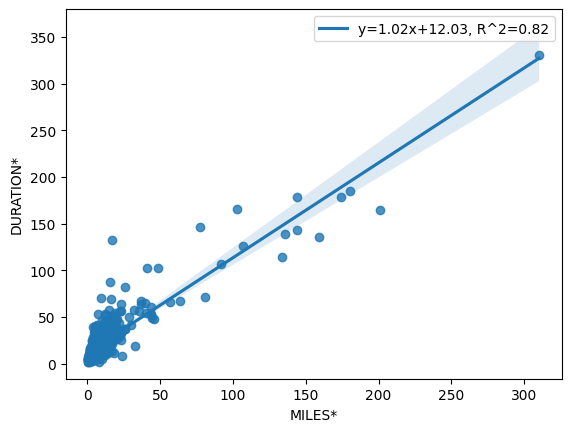

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

df = df.dropna()
s, i, r, _, _ = linregress(df['MILES*'], df['DURATION*'])

fig, ax = plt.subplots()
sns.regplot(x='MILES*', y='DURATION*', data=df, ax=ax,
            line_kws={'label':'y={:.2f}x+{:.2f}, R^2={:.2f}'.format(s, i, r**2)})
plt.legend()

In [18]:
df = pd.read_csv('/content/drive/MyDrive/datasets/German_credit/German_credit.csv')
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [19]:
df['Age'].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

In [20]:
pd.cut(df['Age'], bins=8)

0        (61.0, 68.0]
1      (18.944, 26.0]
2        (47.0, 54.0]
3        (40.0, 47.0]
4        (47.0, 54.0]
            ...      
995      (26.0, 33.0]
996      (33.0, 40.0]
997      (33.0, 40.0]
998    (18.944, 26.0]
999      (26.0, 33.0]
Name: Age, Length: 1000, dtype: category
Categories (8, interval[float64, right]): [(18.944, 26.0] < (26.0, 33.0] < (33.0, 40.0] <
                                           (40.0, 47.0] < (47.0, 54.0] < (54.0, 61.0] <
                                           (61.0, 68.0] < (68.0, 75.0]]

In [21]:
pd.cut(df['Age'], bins=8).reset_index().groupby('Age').size()

Age
(18.944, 26.0]    240
(26.0, 33.0]      276
(33.0, 40.0]      210
(40.0, 47.0]      123
(47.0, 54.0]       72
(54.0, 61.0]       41
(61.0, 68.0]       31
(68.0, 75.0]        7
dtype: int64

In [22]:
bins = [10, 20, 30, 40, 50, 60, 70, 80]
pd.cut(df['Age'], bins=bins)

0      (60, 70]
1      (20, 30]
2      (40, 50]
3      (40, 50]
4      (50, 60]
         ...   
995    (30, 40]
996    (30, 40]
997    (30, 40]
998    (20, 30]
999    (20, 30]
Name: Age, Length: 1000, dtype: category
Categories (7, interval[int64, right]): [(10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] <
                                         (60, 70] < (70, 80]]

In [24]:
bins = [10, 20, 30, 40, 50, 60, 70, 80]
pd.cut(df['Age'], bins=bins, right=False)

0      [60, 70)
1      [20, 30)
2      [40, 50)
3      [40, 50)
4      [50, 60)
         ...   
995    [30, 40)
996    [40, 50)
997    [30, 40)
998    [20, 30)
999    [20, 30)
Name: Age, Length: 1000, dtype: category
Categories (7, interval[int64, left]): [[10, 20) < [20, 30) < [30, 40) < [40, 50) < [50, 60) <
                                        [60, 70) < [70, 80)]

In [25]:
pd.qcut(df['Age'], q=8)

0      (49.125, 75.0]
1      (18.999, 24.0]
2      (42.0, 49.125]
3      (42.0, 49.125]
4      (49.125, 75.0]
            ...      
995      (30.0, 33.0]
996      (36.0, 42.0]
997      (36.0, 42.0]
998    (18.999, 24.0]
999      (24.0, 27.0]
Name: Age, Length: 1000, dtype: category
Categories (8, interval[float64, right]): [(18.999, 24.0] < (24.0, 27.0] < (27.0, 30.0] <
                                           (30.0, 33.0] < (33.0, 36.0] < (36.0, 42.0] <
                                           (42.0, 49.125] < (49.125, 75.0]]

In [26]:
pd.qcut(
    df['Age'], q=8, duplicates='drop'
).reset_index().groupby('Age').size()

Age
(18.999, 24.0]    149
(24.0, 27.0]      142
(27.0, 30.0]      120
(30.0, 33.0]      105
(33.0, 36.0]      111
(36.0, 42.0]      138
(42.0, 49.125]    110
(49.125, 75.0]    125
dtype: int64

In [27]:
s = pd.Series([0, 0, 1, 1, 0, 1, 1, 1, 1, 0])
s

0    0
1    0
2    1
3    1
4    0
5    1
6    1
7    1
8    1
9    0
dtype: int64

In [28]:
sc = s.cumsum()
sc

0    0
1    0
2    1
3    2
4    2
5    3
6    4
7    5
8    6
9    6
dtype: int64

In [29]:
s.mul(sc)

0    0
1    0
2    1
3    2
4    0
5    3
6    4
7    5
8    6
9    0
dtype: int64

In [30]:
s.mul(sc).diff()

0    NaN
1    0.0
2    1.0
3    1.0
4   -2.0
5    3.0
6    1.0
7    1.0
8    1.0
9   -6.0
dtype: float64

In [31]:
s.mul(sc).diff().where(lambda x: x<0)

0    NaN
1    NaN
2    NaN
3    NaN
4   -2.0
5    NaN
6    NaN
7    NaN
8    NaN
9   -6.0
dtype: float64

In [33]:
s.mul(sc).diff().where(lambda x: x<0).ffill()

0    NaN
1    NaN
2    NaN
3    NaN
4   -2.0
5   -2.0
6   -2.0
7   -2.0
8   -2.0
9   -6.0
dtype: float64

In [34]:
s.mul(sc).diff().where(lambda x: x<0).ffill().add(sc, fill_value=0)

0    0.0
1    0.0
2    1.0
3    2.0
4    0.0
5    1.0
6    2.0
7    3.0
8    4.0
9    0.0
dtype: float64

In [36]:
df = pd.read_csv('/content/drive/MyDrive/datasets/APPL_price/APPL_price.csv')
s = df['Close'] > 175
s.sum()

22

In [37]:
sc = s.cumsum()
s.mul(sc).diff().where(lambda x: x<0).ffill().add(sc, fill_value=0).max()

9.0

In [38]:
 df = pd.read_csv('/content/drive/MyDrive/datasets/weight_height/weight_height.csv')
 df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.452378
std,3.847528,32.171523
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,390.200000


<Axes: xlabel='Weight', ylabel='Height'>

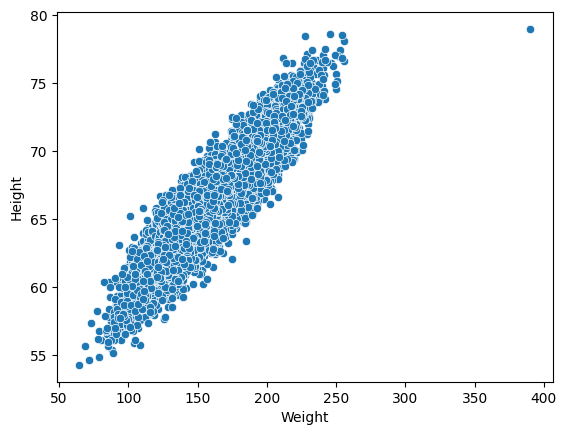

In [39]:
import seaborn as sns
sns.scatterplot(x='Weight', y='Height', data=df)

In [40]:
df_new = df.query('Weight < 350')
df_new.describe()

,Height,Weight
count,9999.000000,9999.000000
mean,66.366297,161.429501
std,3.845646,32.091686
min,54.263133,64.700127
25%,63.505347,135.817009
50%,66.317899,161.201891
75%,69.172069,187.152394
max,78.621374,255.863326


In [41]:
criteria = df['Weight'].quantile(0.9999)
criteria

255.876760167255

<Axes: xlabel='Weight', ylabel='Height'>

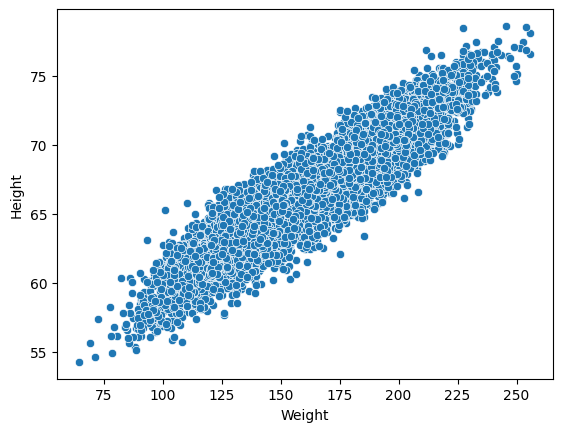

In [42]:
df_new = df[df['Weight'] < criteria]

sns.scatterplot(x='Weight', y='Height', data=df_new)

In [43]:
df[df['Weight'] > 390].index

Index([2014], dtype='int64')

In [44]:
df['Weight'] = df['Weight'].clip(50, 300)
df.iloc[2014]

Gender         Male
Height    78.998742
Weight        300.0
Name: 2014, dtype: object

In [50]:
s = pd.Series([1, 2, 3, np.nan, np.nan, 6, 7, np.nan, np.nan])
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    6.0
6    7.0
7    NaN
8    NaN
dtype: float64

In [51]:
s.interpolate(
    method="spline", order=1, limit_direction="forward", limit=2
)

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
5    6.0
6    7.0
7    8.0
8    9.0
dtype: float64

In [52]:
df = pd.read_csv('/content/drive/MyDrive/datasets/Covid19-US/us_confirmed.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Admin2          29948 non-null  object        
 1   Date            30000 non-null  datetime64[ns]
 2   Case            30000 non-null  int64         
 3   Country/Region  30000 non-null  object        
 4   Province/State  30000 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.1+ MB


In [53]:
df.head()

,Admin2,Date,Case,Country/Region,Province/State
0,Price,2020-08-10,33,US,Wisconsin
1,Garvin,2021-08-14,3929,US,Oklahoma
2,Butte,2020-01-24,0,US,Idaho
3,Lowndes,2021-01-25,10377,US,Georgia
4,Ringgold,2020-12-06,260,US,Iowa


In [54]:
df = df.set_index('Date').sort_values('Date')
df['2020-01':'2020-02']

,Admin2,Case,Country/Region,Province/State
Date,,,,
2020-01-22,Winnebago,0,US,Illinois
2020-01-22,Barceloneta,0,US,Puerto Rico
2020-01-22,Montgomery,0,US,Indiana
2020-01-22,Johnson,0,US,Iowa
2020-01-22,Barron,0,US,Wisconsin
...,...,...,...,...
2020-02-29,Butte,0,US,California
2020-02-29,Essex,0,US,Massachusetts
2020-02-29,Alleghany,0,US,Virginia


In [55]:
df = df.reset_index().set_index('Province/State').sort_index()
df.index.unique()

Index(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware', 'Diamond Princess',
       'District of Columbia', 'Florida', 'Georgia', 'Grand Princess', 'Guam',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Northern Mariana Islands', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'],
      dtype='object', name='Province/State')

In [61]:
df['Ca':'Df']

,Date,Admin2,Case,Country/Region
Province/State,,,,
California,2020-06-04,Tuolumne,4,US
California,2020-06-06,San Benito,90,US
California,2021-12-18,Unassigned,330,US
California,2020-03-22,San Joaquin,33,US
California,2021-04-24,Sierra,63,US
...,...,...,...,...
Delaware,2021-08-04,Out of DE,0,US
Delaware,2020-03-22,Out of DE,0,US
Delaware,2020-06-11,Unassigned,13,US


In [62]:
df = pd.read_csv('/content/drive/MyDrive/datasets/Covid19-US/us_confirmed.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date').sort_values('Date')

In [63]:
states = df['Province/State'].unique()[0:3]
df = df[df['Province/State'].isin(states)]

In [65]:
df.groupby([pd.Grouper(freq='6m'), 'Province/State'])['Case'].mean()

Date        Province/State
2020-01-31  Illinois              0.000000
            Indiana               0.000000
            Puerto Rico           0.000000
2020-07-31  Illinois            488.322727
            Indiana             222.080745
            Puerto Rico          18.608187
2021-01-31  Illinois           4996.807487
            Indiana            2683.175532
            Puerto Rico         526.294798
2021-07-31  Illinois           9314.986486
            Indiana            6138.547619
            Puerto Rico        1503.891156
2022-01-31  Illinois          32778.534653
            Indiana           13475.709677
            Puerto Rico        3225.673077
2022-07-31  Illinois          43229.678161
            Indiana           17653.965909
            Puerto Rico        5938.734177
Name: Case, dtype: float64

In [66]:
df = pd.read_csv('/content/drive/MyDrive/datasets/product_inspection/product_inspection.csv')
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,inspection_step,value,upper_spec,target,lower_spec
0,2022-01-01,A,21.2,22.0,21.3,20.6
1,2022-01-02,A,21.7,22.0,21.3,20.6
2,2022-01-03,A,21.4,22.0,21.3,20.6
3,2022-01-04,A,21.5,22.0,21.3,20.6
4,2022-01-05,A,21.5,22.0,21.3,20.6


In [68]:
df.groupby('inspection_step')['value'].mean()

inspection_step
A    21.295105
B    31.628671
C    28.792308
Name: value, dtype: float64

In [70]:
df['normalized1'] = df.groupby('inspection_step')['value'].transform(lambda x: (x-x.mean())/x.std())
df['normalized1']

0     -0.366795
1      1.561575
2      0.404553
3      0.790227
4      0.790227
         ...   
424    1.356267
425   -1.502891
426    0.800320
427    0.482636
428   -1.344049
Name: normalized1, Length: 429, dtype: float64

In [71]:
temp = df.sort_values(['inspection_step','date']).drop_duplicates('inspection_step')
temp

,date,inspection_step,value,upper_spec,target,lower_spec,normalized1
0,2022-01-01,A,21.2,22.0,21.3,20.6,-0.366795
143,2022-01-01,B,31.6,32.1,31.6,31.1,-0.159778
286,2022-01-01,C,29.7,32.5,28.9,25.3,0.720899


In [72]:
temp = temp.set_index('inspection_step')['value']
temp

inspection_step
A    21.2
B    31.6
C    29.7
Name: value, dtype: float64

In [73]:
df = df.set_index('inspection_step')
df['normalized2'] = df['value'] - temp
df = df.reset_index()

In [74]:
df = pd.read_csv('/content/drive/MyDrive/datasets/product/product.csv')
df.head()

,date,process,factory,operator,product_id,passfail
0,2023-02-01,P1,A2,1,A259721,P
1,2023-02-01,P2,A2,V,A259721,P
2,2023-02-01,P3,A2,Y,A259721,P
3,2023-02-01,P1,A2,1,A100109,P
4,2023-02-01,P2,A2,W,A100109,P


In [75]:
df['path'] = df.groupby('product_id')['operator'].transform(lambda x: '_'.join(x))
df['path']

0       1_V_Y
1       1_V_Y
2       1_V_Y
3       1_W_Y
4       1_W_Y
        ...  
1057    1_V_Y
1058    1_V_Y
1059    1_V_Y
1060    1_V_Y
1061    1_V_Y
Name: path, Length: 1062, dtype: object

In [76]:
df['path'] = df['factory'] + '_' + df['path']
df = df.drop_duplicates('product_id')
df = df[['date','product_id', 'passfail', 'path']]
df

,date,product_id,passfail,path
0,2023-02-01,A259721,P,A2_1_V_Y
3,2023-02-01,A100109,P,A2_1_W_Y
6,2023-02-01,A870944,P,A2_2_W_Y
9,2023-02-01,A587346,P,A2_2_V_Y
12,2023-02-01,A525921,P,A2_2_V_X
...,...,...,...,...
1047,2023-03-31,A917956,P,A1_2_W_Y
1050,2023-03-31,A860621,P,A2_1_V_X
1053,2023-03-31,A268064,P,A2_1_V_X
1056,2023-03-31,A817755,P,A2_1_V_Y


In [77]:
df.groupby('passfail')['path'].value_counts()

passfail  path    
F         A2_2_W_X     3
          A2_2_V_X     3
          A2_1_V_X     2
          A2_1_W_X     1
P         A1_1_V_X    32
          A1_1_V_Y    26
          A2_1_W_Y    24
          A2_1_V_X    24
          A1_1_W_Y    23
          A1_2_W_Y    23
          A2_2_W_X    22
          A1_2_V_X    22
          A1_2_V_Y    22
          A2_2_W_Y    21
          A2_1_V_Y    20
          A2_1_W_X    20
          A2_2_V_Y    17
          A1_1_W_X    17
          A2_2_V_X    16
          A1_2_W_X    16
Name: count, dtype: int64

In [78]:
df.groupby(['passfail'])['date'].value_counts()

passfail  date      
F         2023-03-10    3
          2023-03-12    2
          2023-03-11    2
          2023-03-09    2
P         2023-02-28    6
                       ..
          2023-02-22    6
          2023-03-12    4
          2023-03-11    4
          2023-03-09    4
          2023-03-10    3
Name: count, Length: 63, dtype: int64

In [79]:
df = pd.read_csv('/content/drive/MyDrive/datasets/product/product.csv')
df['path'] = df.groupby('product_id')['operator'].transform(lambda x: '_'.join(x))
df['path'] = df['factory'] + '_' + df['path']
df = df.drop_duplicates('product_id')
df = df[['date', 'product_id', 'passfail', 'path']]

df['path'].head()

0     A2_1_V_Y
3     A2_1_W_Y
6     A2_2_W_Y
9     A2_2_V_Y
12    A2_2_V_X
Name: path, dtype: object

In [80]:
df['factory'] = df['path'].map(lambda x: x[0:2])
df['path'] = df['path'].map(lambda x: x[3:])

df.head()

,date,product_id,passfail,path,factory
0,2023-02-01,A259721,P,1_V_Y,A2
3,2023-02-01,A100109,P,1_W_Y,A2
6,2023-02-01,A870944,P,2_W_Y,A2
9,2023-02-01,A587346,P,2_V_Y,A2
12,2023-02-01,A525921,P,2_V_X,A2


In [81]:
df['path'] = df['path'].map(lambda x: x.split('_'))
df['path'].head()

0     [1, V, Y]
3     [1, W, Y]
6     [2, W, Y]
9     [2, V, Y]
12    [2, V, X]
Name: path, dtype: object

In [82]:
df = df.explode('path')
df.head(9)

,date,product_id,passfail,path,factory
0,2023-02-01,A259721,P,1,A2
0,2023-02-01,A259721,P,V,A2
0,2023-02-01,A259721,P,Y,A2
3,2023-02-01,A100109,P,1,A2
3,2023-02-01,A100109,P,W,A2
3,2023-02-01,A100109,P,Y,A2
6,2023-02-01,A870944,P,2,A2
6,2023-02-01,A870944,P,W,A2
6,2023-02-01,A870944,P,Y,A2


In [83]:
process_map = {
    '1':'P1',
    '2':'P1',
    '3':'P2',
    '4':'P2',
    '5':'P3',
    '6':'P3'
}

df['process'] = df['path'].map(process_map)
df = df.rename({'path':'operator'}, axis=1)

df.head(9)

,date,product_id,passfail,operator,factory,process
0,2023-02-01,A259721,P,1,A2,P1
0,2023-02-01,A259721,P,V,A2,NaN
0,2023-02-01,A259721,P,Y,A2,NaN
3,2023-02-01,A100109,P,1,A2,P1
3,2023-02-01,A100109,P,W,A2,NaN
3,2023-02-01,A100109,P,Y,A2,NaN
6,2023-02-01,A870944,P,2,A2,P1
6,2023-02-01,A870944,P,W,A2,NaN
6,2023-02-01,A870944,P,Y,A2,NaN
